# 1. Image classification with CNNs

Learn about image classification with CNNs, the difference between the binary and multi-class image classification models, and how to use transfer learning for image classification in PyTorch.

In [1]:
import torch
import torch.nn as nn
import torchvision.transforms.functional as F
from PIL import Image
import matplotlib.pyplot as plt

## Binary and multi-class image classification

### The number of classes

To determine whether to use a binary or a multi-class model for a classification problem, you need to know the number of classes in the data. The Torch dataset is available in your workspace as train_dataset.

In [ ]:
train_dataset.classes
# ['cat', 'dog']

### Binary classification model

As a deep learning practitioner, one of your main tasks is training models for image classification. You often encounter binary classification, where you need to distinguish between two classes. To streamline your workflow and ensure reusability, you have decided to create a template for a binary image classification CNN model, which can be applied to future projects.

All image sizes are 64x64 pixels.

Instructions:

- Create a convolutional layer with 3 channels, 16 output channels, kernel size of 3, stride of 1, and padding of 1.
- Create a fully connected layer with an input size of 16x32x32 and a number of classes equal to 1; include only the values in the provided order `(16*32*32, 1)`.
- Create a `sigmoid` activation function.

In [ ]:
class BinaryImageClassifier(nn.Module):
    def __init__(self):
        super(BinaryImageClassifier, self).__init__()

        # Create a convolutional layer
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()

        # Create a fully connected layer
        self.fc = nn.Linear(16 * 32 * 32, 1)

        # Create an activation function
        self.sigmoid = nn.Sigmoid()

Notice that the fully connected (`fc`) layer has an input size of 16x32x32. This is due to the original image input size being 64x64. After passing through the max pooling layer, the spatial dimensions are reduced in half, resulting in 32x32.

### Multi-class classification model

With a template for a binary classification model in place, you can now build on it to design a multi-class classification model. The model should handle different numbers of classes via a parameter, allowing you to tailor the model to a specific multi-class classification task in the future.
All image sizes are 64x64 pixels.

Instructions:

- Define the `__init__` method including `self` and `num_classes` as parameters.
- Create a fully connected layer with the input size of `16*32*32` and the number of classes `num_classes` as output.
- Create an activation function `softmax` with `dim=1`.

In [ ]:
class MultiClassImageClassifier(nn.Module):

    # Define the init method
    def __init__(self, num_classes):
        super(MultiClassImageClassifier, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()

        # Create a fully connected layer
        self.fc = nn.Linear(16 * 32 * 32, num_classes)

        # Create an activation function
        self.softmax = nn.Softmax(dim=1)

## Convolutional layers for images

### RGB, grayscale, or alpha?

Your team obtained a new image dataset for training. Before designing a model, you want to check if the images are RGB, grayscale, or with a transparency alpha channel. Assuming all the images in the dataset are the same, you only need to check one sample image.

In [ ]:
F.get_image_num_channels(image)

### Adding a new convolutional layer

Your project lead provided you with a new CNN model. Let's take a look at the model's architecture and append a new convolutional layer to it.

Instructions:

- Instantiate a model from the `CNNModel` class and access the convolutional layers.
- Create a new convolutional layer with `in_channels` equal to existing layer's `out_channels`, `out_channels` set to 32, and `stride` and `padding` both set to 1, and assign it to `conv2`.
- Append the new layer to the model, calling it `"conv2"`.

In [ ]:
# Create a model
model = CNNModel()
print("Original model: ", model)

#CNNModel(
# (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
#)

In [ ]:
# Create a new convolutional layer
conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)

# Append the new layer to the model
model.add_module("conv2", conv2)
print("Extended model: ", model)

# Extended model:  CNNModel(
#     (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
#     (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
# )

### Creating a sequential block

You decided to redesign your binary CNN model template by creating a block of convolutional layers. This will help you stack multiple layers sequentially. With this improved model, you will be able to easily design various CNN architectures.

Instructions:

- In the `__init__()` method, define a block of convolutional layers and assign it to `self.conv_block`.
- In the `forward()` pass, pass the inputs through the convolutional block you defined.

In [ ]:
class BinaryImageClassification(nn.Module):
    def __init__(self):
        super(BinaryImageClassification, self).__init__()
        # Create a convolutional block
        self.conv_block = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
        )

    def forward(self, x):
        # Pass inputs through the convolutional block
        x = self.conv_block(x)
        return x

## Working with pre-trained models

### Save and load a model

A manufacturing company wants to classify their projects based on images and determine the appropriate shipping packaging. Having trained a highly accurate model in PyTorch, you now plan to save the model and its pre-trained weights for future use and to share it with your team, making sure they can seamlessly load it.

Instructions:

- Save the pre-trained model as `ModelCNN.pth` remembering to save the weights, not only the architecture.
- Create a model instance called `loaded_model` from the class `ManufacturingCNN()`.
- Load `ModelCNN.pth` weights to `loaded_model` by passing the weights to `.load_state_dict()`.

In [ ]:
# ManufacturingCNN(
#   (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
#   (relu): ReLU()
#   (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
#   (fc1): Linear(in_features=4096, out_features=4, bias=True)
# )

In [ ]:
# Save the model
torch.save(model.state_dict(), "ModelCNN.pth")

# Create a new model
loaded_model = ManufacturingCNN()

# Load the saved model
loaded_model.load_state_dict(torch.load("ModelCNN.pth"))
print(loaded_model)

### Loading a pre-trained model

You are building an application to label images from the social media. This task requires high accuracy and speed. You are going to use a pre-trained ResNet18 model to infer image classes.

Instructions:

- Import `resnet18` and `ResNet18_Weights` from `torchvision.models`.
- Instantiate the `model` using `resnet18()`, setting the weights parameter to `weights`.
- Set `model` to the evaluation mode.
- Initialize the input transforms and assign them to `transform`.

In [2]:
# Import resnet18 model
from torchvision.models import resnet18, ResNet18_Weights

# Initialize model with default weights
weights = ResNet18_Weights.DEFAULT
model = resnet18(weights=weights)

# Set model to evaluation mode
model.eval()

# Initialize the transforms
transform = weights.transforms()

In [3]:
print(transform)

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)


### Image classification with ResNet

You have created the model from the pre-trained ResNet18. Now, it is time to test it on an example image.

You are going to apply preprocessing transforms to an image and classify it. You will need to use the `softmax()` layer followed by the `argmax()`, since ResNet18 has been trained on a multi-class dataset.

You have selected the following image to use for prediction testing:

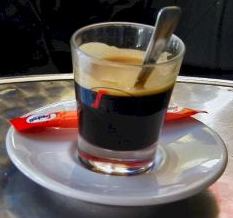

The preprocessing transform is saved as transform. The PIL image is uploaded as img.

Instructions:

- Apply the preprocessing transforms to the image and reshape it using `.unsqueeze(0)` to add the batch dimension.
- Pass the image through the model, reshape the output using `.squeeze(0)` to remove the batch dimension, and add a `softmax()` layer.
- Apply `argmax()` to select the highest-probability class.

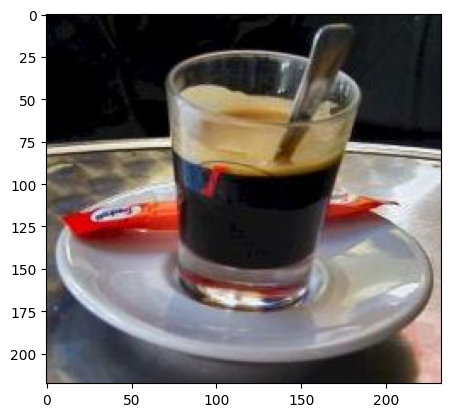

In [4]:
img = Image.open("images/Espresso.jpeg")
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


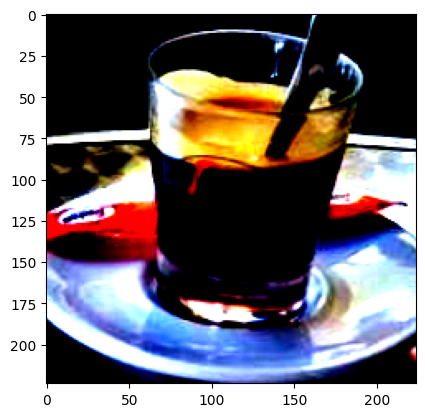

In [5]:
tt = transform(img)
plt.imshow(tt.permute(1,2,0))

In [6]:
# Apply preprocessing transforms
batch = transform(img).unsqueeze(0)

with torch.no_grad():
    # Apply model with softmax layer
    prediction = model(batch).squeeze(0).softmax(0)

# Apply argmax
class_id = prediction.argmax().item()
score = prediction[class_id].item()
category_name = weights.meta["categories"][class_id]
print(category_name)

espresso
